# Identifying and removing outliers

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize = (20,10))

In [71]:
df_rent_data = pd.read_csv("data/aluguel.csv", sep=";")
df_rent_data.head()

,Type,Location,Bedrooms,Parking,Suites,Area,Rent,Condo fee,City fee,Total Gross,Rent/Sqm,Total Gross/Sqm,House/Apart
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Others
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,House
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67,68.87,Others
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartment
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartment


In [72]:
# identify the edges
rent = df_rent_data['Rent']
q1 = rent.quantile(.25)
q3 = rent.quantile(.75)
iiq = q3 - q1
bottom_limit = q1 - 1.5 * iiq
top_limit = q3 + 1.5 * iiq
print("Bottom limit {}, Top limit {}".format(bottom_limit, top_limit))

Bottom limit -6000.0, Top limit 14000.0


In [73]:
# removing outliers
selection =  (rent >= bottom_limit) & (rent <= top_limit)
df_rent_selected = df_rent_data[selection]

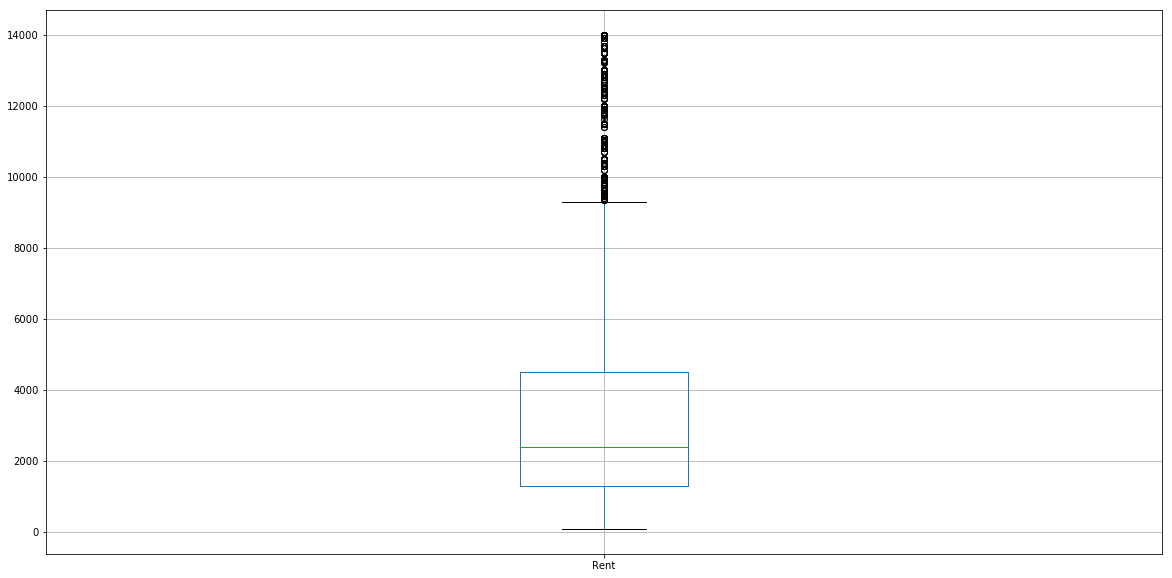

In [74]:
# present with boxsplot
df_rent_selected.boxplot(['Rent'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4AF55F668>]],
      dtype=object)

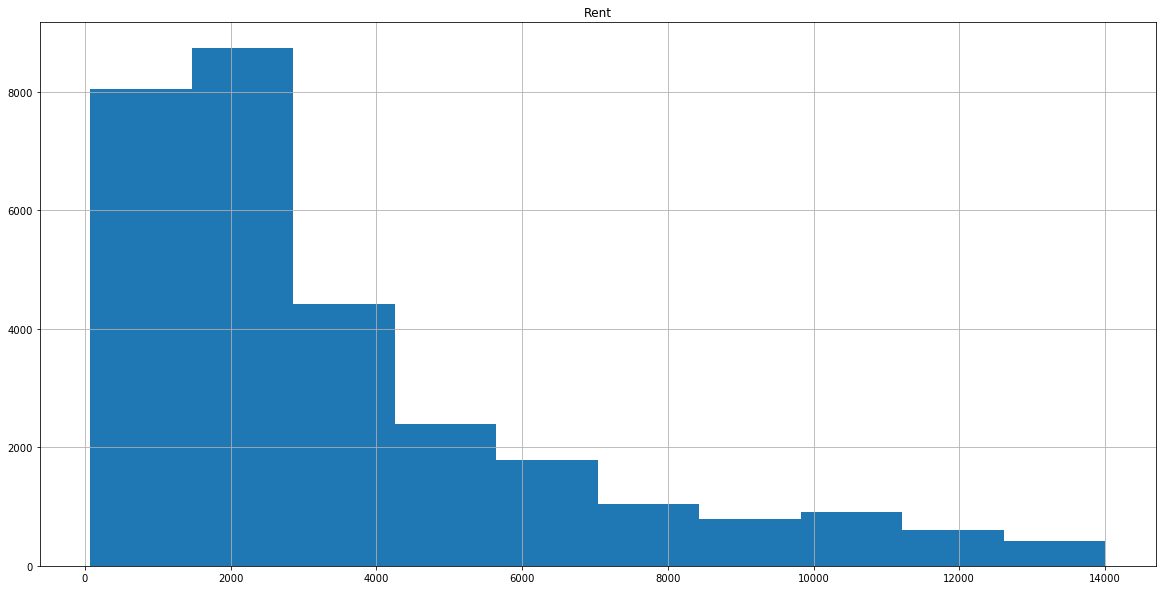

In [75]:
# present with histogram
df_rent_selected.hist(['Rent'])

# Identifying and removing outliers by group

In [96]:
# group the rent price by type
df_rent_selected_group = df_rent_data.query("Type in ('Apartamento', 'Casa', 'Casa de Vila', 'Casa de Condomínio')").groupby('Type')['Rent']
df_rent_selected_group.groups

{'Apartamento': Int64Index([    3,     4,     5,     6,    10,    11,    12,    13,    15,
                19,
             ...
             32943, 32944, 32947, 32949, 32950, 32951, 32953, 32956, 32957,
             32958],
            dtype='int64', length=19532),
 'Casa': Int64Index([    1,    31,    74,    82,   138,   142,   216,   236,   269,
               357,
             ...
             32613, 32644, 32652, 32732, 32739, 32778, 32859, 32893, 32911,
             32931],
            dtype='int64', length=967),
 'Casa de Condomínio': Int64Index([    7,     8,    18,    22,    59,    85,   248,   253,   272,
               306,
             ...
             32792, 32796, 32807, 32853, 32867, 32869, 32898, 32908, 32924,
             32952],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([  117,   312,   324,   459,   504,  1052,  1239,  1271,  1377,
              1515,
             ...
             32041, 32048, 32137, 32245, 32282, 32302, 32620, 32686, 32804

In [97]:
q1 = df_rent_selected_group.quantile(.25)
q3 = df_rent_selected_group.quantile(.75)
iiq = q3 - q1
bottom_limit = q1 - 1.5 * iiq
top_limit = q3 + 1.5 * iiq

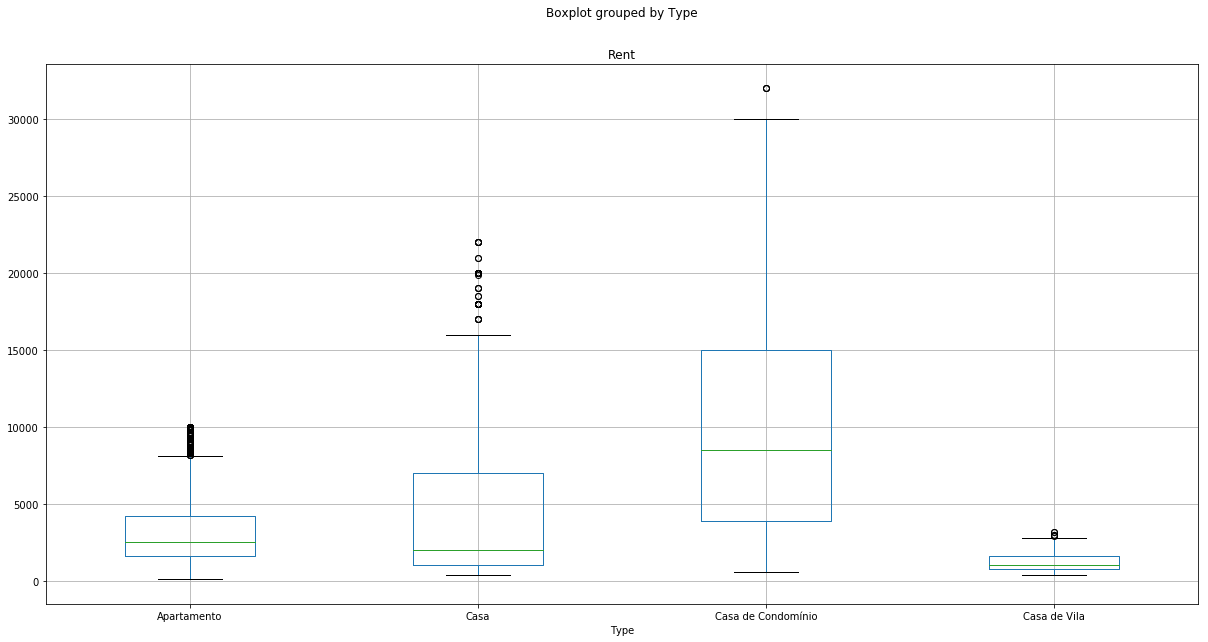

In [98]:
# remove outlines by rent type
df_data_new = pd.DataFrame()

# for each type, select the records whithin the outlines
for rent_type in df_rent_selected_group.groups.keys():
    is_type = df_rent_data['Type'] == rent_type
    df_type_selected = df_rent_data[is_type]
    
    is_within_limits = (df_type_selected['Rent'] >= bottom_limit[rent_type]) & (df_type_selected['Rent'] <= top_limit[rent_type])
    df_within_limits = df_type_selected[is_within_limits]
    
    df_data_new = pd.concat([df_data_new, df_within_limits])

df_data_new.boxplot(['Rent'], by = 'Type')

In [79]:
df_rent_data['Rent']

0         1700.0
1         7000.0
2         5200.0
3          800.0
4          800.0
5         1200.0
6         1300.0
7        22000.0
8         1000.0
9        35000.0
10        1200.0
11        1500.0
12        1500.0
13        2000.0
14        1800.0
15       13000.0
16       28000.0
17        3800.0
18        2000.0
19         950.0
20        1700.0
21        1900.0
22        7500.0
23        1000.0
24        2000.0
25        4500.0
26        1100.0
27        7000.0
28         750.0
29        1300.0
          ...   
32930      500.0
32931     5000.0
32932     1500.0
32933     2100.0
32934     2200.0
32935     4300.0
32936     4100.0
32937    10000.0
32938     1950.0
32939     1100.0
32940     2250.0
32941     2300.0
32942     2000.0
32943     5500.0
32944     1550.0
32945     1500.0
32946     4000.0
32947     3000.0
32948      600.0
32949    15000.0
32950     1000.0
32951     1000.0
32952    15000.0
32953      900.0
32954    14000.0
32955      800.0
32956     1800.0
32957     1400